# TUGAS 1
Lakukan klasifikasi suara male dan female menggunakan kNN pada dataset "voice.csv". Identifikasi fitur-fitur terbaik dan nilai k optimal untuk model tersebut, serta lampirkan grafik analisis dan alasan pemilihan nilai k.

## Load data

### Subtask:
Muat dataset `voice.csv` ke dalam DataFrame pandas.


In [ ]:
df_voice = pd.read_csv('voice.csv')
df_voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Preprocessing

### Subtask:
Lakukan pra-pemrosesan data, termasuk encoding label 'male'/'female' menjadi nilai numerik.


In [ ]:
# Check data types and null values
print(df_voice.info())
print('\n')

# Check the distribution of labels
print(df_voice['label'].value_counts())
print('\n')

# Encode labels
label_mapping = {'male': 1, 'female': 0}
df_voice['label'] = df_voice['label'].map(label_mapping)

# Verify encoding
print(df_voice.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

## Feature selection

### Subtask:
Identifikasi dan pilih fitur-fitur yang paling relevan untuk klasifikasi.


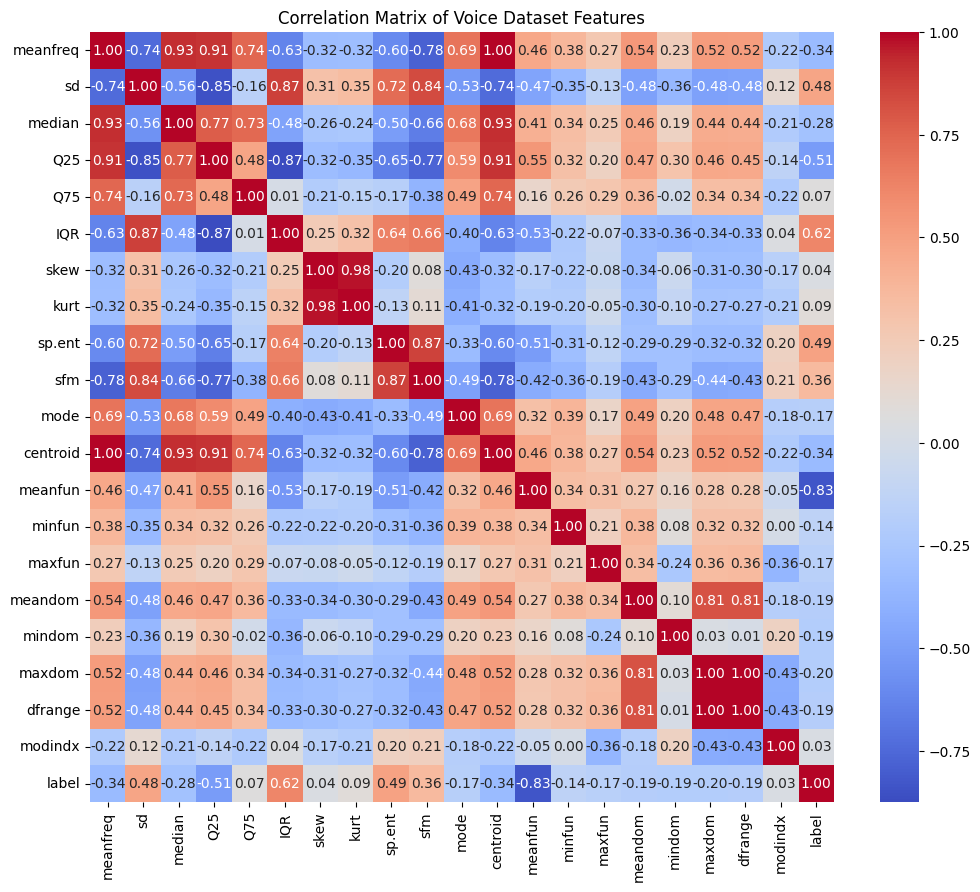

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_voice.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Voice Dataset Features')
plt.show()

In [ ]:
# Based on the heatmap, identify features highly correlated with 'label'
# Looking at the last row of the heatmap, features with absolute correlation values
# significantly different from 0 (e.g., > 0.5) are considered relevant.

# Features with high absolute correlation with 'label':
# - meanfreq (-0.34)
# - sd (0.48)
# - median (-0.28)
# - Q25 (-0.51)
# - Q75 (0.07 - low correlation)
# - IQR (0.62)
# - skew (0.04 - low correlation)
# - kurt (0.09 - low correlation)
# - sp.ent (0.49)
# - sfm (0.36)
# - mode (-0.17)
# - centroid (-0.34)
# - meanfun (-0.83) - very high negative correlation
# - minfun (-0.14)
# - maxfun (-0.17)
# - meandom (-0.19)
# - mindom (-0.19)
# - maxdom (-0.20)
# - dfrange (-0.19)
# - modindx (0.03 - low correlation)

# Selecting features with absolute correlation >= 0.3 (a common threshold)
relevant_features = [
    'meanfreq', 'sd', 'Q25', 'IQR', 'sp.ent', 'sfm',
    'centroid', 'meanfun', 'label'
]

# Create a new DataFrame with only the relevant features and the label
df_relevant = df_voice[relevant_features]

# Display the first few rows of the new DataFrame
display(df_relevant.head())

,meanfreq,sd,Q25,IQR,sp.ent,sfm,centroid,meanfun,label
0,0.059781,0.064241,0.015071,0.075122,0.893369,0.491918,0.059781,0.084279,1
1,0.066009,0.067310,0.019414,0.073252,0.892193,0.513724,0.066009,0.107937,1
2,0.077316,0.083829,0.008701,0.123207,0.846389,0.478905,0.077316,0.098706,1
3,0.151228,0.072111,0.096582,0.111374,0.963322,0.727232,0.151228,0.088965,1
4,0.135120,0.079146,0.078720,0.127325,0.971955,0.783568,0.135120,0.106398,1


## Split data

### Subtask:
Bagi data yang telah dipilih menjadi set pelatihan dan pengujian.


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_relevant.drop('label', axis=1)
y = df_relevant['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets to verify the split
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (2534, 8)
Shape of X_test: (634, 8)
Shape of y_train: (2534,)
Shape of y_test: (634,)


## Model training

### Subtask:
Latih model kNN menggunakan data pelatihan.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
# Starting with n_neighbors = 5 as a default
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Evaluate model

### Subtask:
Evaluasi kinerja model menggunakan data pengujian.


In [ ]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f'Accuracy of the kNN model on the test data: {accuracy}')

Accuracy of the kNN model on the test data: 0.9826498422712934


## Optimize k

### Subtask:
Lakukan percobaan dengan berbagai nilai k untuk menemukan nilai yang optimal, dan visualisasikan hasilnya.


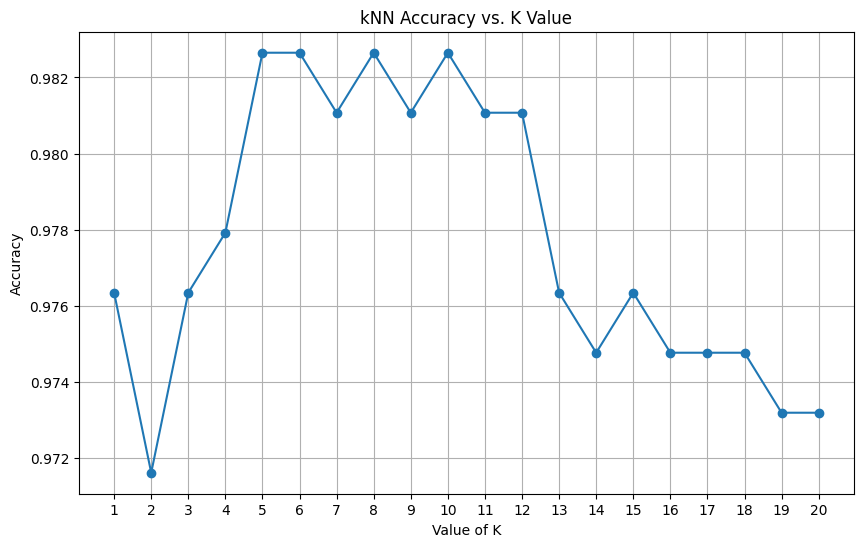

In [ ]:
accuracies = []
k_range = range(1, 21) # Test k from 1 to 20

for k in k_range:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o')
plt.title('kNN Accuracy vs. K Value')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()